# Normalización

La normalización es el proceso con el que los datos de un atributo numérico se transforman para que estén en un rango definido, es decir, que los datos estén en una escala similar.

## Lectura de datos

En esta ocasión utilizaremos el conocido dataset de precios de casas en california. La variable objetivo es un valor continuo que hace referencia al precio de la vivienda, es decir, estamos ante un problema de regresión, aunque en esta ocasión nos centraremos en el preproceso, en las técnicas de normalización.

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Aquí podemos ver la estructura y unas filas del dataset que utilizaremos:

In [3]:
data = fetch_california_housing()
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df['MedHouseVal'] = data.target
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Métodos de normalización

En esta ocasión se mostrarán ejemplos de los métodos de normalización más conocidos.

### Escalar a un rango

Se basa en cambiar el rango de las variables de su rango original (por ejemplo, de 100 a 10.000) a un rango estándar, que en la mayoría de los casos sería de 0 a 1 o de -1 a 1, pero no hay ningún problema en utilizar otros rangos, como por ejemplo, de -5 a 5. Este tipo de normalización suele aportar valor cuando el conjunto de atributos está formado por más de un atributo.

En esta ocasión puede ser una buena idea escalar el rango de los atributos, ya que podemos ver que los valores del atributo HouseAge van desde 1 hasta 52, y puede ser conveniente reducir este rango.

Min: 1.0
Max: 52.0


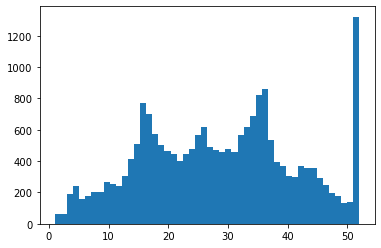

In [4]:
print('Min:', data_df['HouseAge'].min())
print('Max:', data_df['HouseAge'].max())

hist = plt.hist(data_df.HouseAge, bins=50)

Primero aplicaremos la fórmula manualmente para que podamos entender mejor este método de normalización. La fórmula sería la siguiente: 

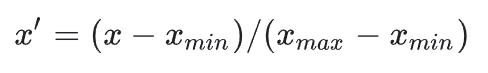

In [5]:
data_df['HouseAgeManually'] = (data_df.HouseAge-data_df.HouseAge.min())/(data_df.HouseAge.max()-data_df.HouseAge.min())

Ahora utilizaremos el estimador MinMaxScaler de scikit-learn que hace exactamente lo mismo que hemos hecho manualmente.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_df['HouseAgeMinMaxScaler'] = scaler.fit_transform(data_df[['HouseAge']])

Podemos observar que de las dos maneras hemos obtenido los mismos resultados, y también que los valores están en un rango de 0 a 1, que era lo que queríamos conseguir.

In [7]:
data_df[['HouseAge', 'HouseAgeManually', 'HouseAgeMinMaxScaler']].head()

,HouseAge,HouseAgeManually,HouseAgeMinMaxScaler
0,41.0,0.784314,0.784314
1,21.0,0.392157,0.392157
2,52.0,1.000000,1.000000
3,52.0,1.000000,1.000000
4,52.0,1.000000,1.000000


Eliminamos la columna que hemos obtenido manualmente porque tenemos dos columnas con exactamente los mismos valores.

In [8]:
data_df = data_df.drop(['HouseAgeManually'], axis=1)

Podemos ver en el histograma que la distribución de los valores no cambia pero si el rango en el que se encuentran estos valores.

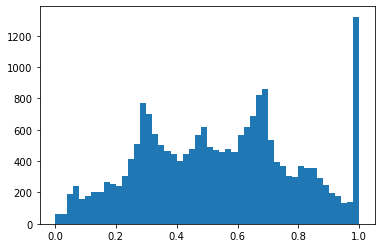

In [9]:
hist = plt.hist(data_df.HouseAgeMinMaxScaler, bins=50)

### Recorte de atributos

El recorte de atributos se utiliza cuando los datos contienen valores anómalos extremos, es conveniente acotarlos en un rango definido. Por ejemplo, si casi todos los valores se encuentran en un rango de -100 a 100 y tenemos unos pocos valores que van hasta los -10.000 o 10.000, es conveniente, que acotamos esos valores a -100 y 100, es decir, directamente convertir estos valores anómalos a los límites establecidos más cercanos. 

En esta ocasión, podemos ver que en la columna Population casi todas las observaciones se encuentran por debajo de 5.000, pero también tenemos valores de hasta 35.000. Por ello, en esta ocasión tiene sentido utilizar el recorte de atributos y convertir los valores anómalos en valores más comunes.

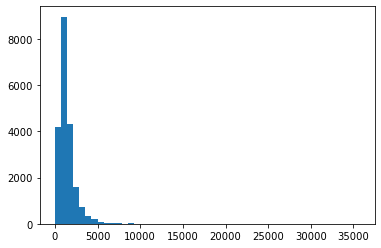

In [13]:
hist = plt.hist(data_df.Population, bins = 50)

En esta ocasión estableceremos los límites con los valores -3σ y 3σ.

In [ ]:
data_df['PopulationFeatureClipping'] = np.clip(data_df.Population, a_min=(-3*data_df.Population.std()), a_max=(3*data_df.Population.std()))
print('Max:', data_df['PopulationFeatureClipping'].max())
data_df[['Population', 'PopulationFeatureClipping']].head()

Max: 3397.3863652960126


,Population,PopulationFeatureClipping
0,322.0,322.0
1,2401.0,2401.0
2,496.0,496.0
3,558.0,558.0
4,565.0,565.0


Podemos observar que el rango ahora es mucho más acotado y ya no tenemos valores anómalos.

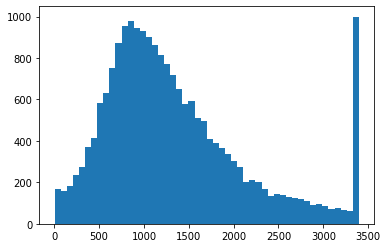

In [ ]:
hist = plt.hist(data_df['PopulationFeatureClipping'], bins=50)

### Escalado logarítmico

Calcula los logaritmos de los valores para reducir su rango. Es útil cuando muchas observaciones se acumulan en unos valores y otros valores tienen muy pocas observaciones. A este tipo de distribuciones se les llama distribuciones de potencia.

En esta ocasión también utilizaremos la columna de Population, ya que podemos ver en el histograma que parece tener una distribución de potencia. Esta es la fórmula: 

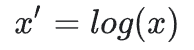

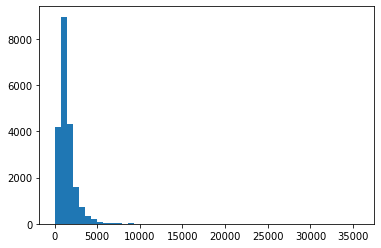

In [ ]:
hist = plt.hist(data_df.Population, bins=50)

Podemos ver como cambia la distribución cuando aplicamos el logaritmo a los valores. Ahora no tenemos tantos valores tan poco representados, ahora el rango es más pequeño y todos los valores están mejor agrupados.

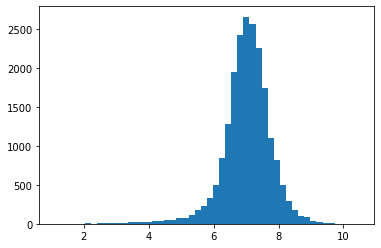

In [ ]:
hist = plt.hist(np.log(data_df.Population), bins=50)

### Estandarización

Representa el número de desviaciones típicas a las que se encuentra la media. Después de la transformación, la media de los valores estandarizados será de 0 y su desviación típica 1. Se recomienda usar este tipo de normalización cuando se tienen unos cuantos valores anómalos, pero estos no sean muy extremos.

Vamos a normalizar la variable MedInc con el método de estandarización, ya que podemos ver que tenemos unos cuantos valores que se alejan de la media.


Esta es la fórmula de la estadandarización:

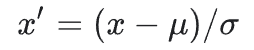

Avg: 3.8706710029070246


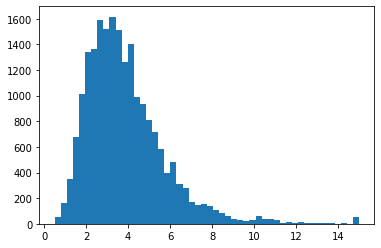

In [ ]:
print('Avg:', data_df.MedInc.mean())
hist = plt.hist(data_df.MedInc, bins=50)

Para poder entender mejor este método de normalización, primero vamos a transformar los valores manualmente.

In [ ]:
data_df['MedIncManually'] = (data_df.MedInc-data_df.MedInc.mean())/data_df.MedInc.std()

Ahora utilizaremos una función de scikit-learn para conseguir exactamente lo mismo.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_df['MedIncStandardScaler'] = scaler.fit_transform(data_df[['MedInc']])

De nuevo, podemos ver que hemos obtenido los mismos valores haciéndolo manualmente y con la función de scikit-learn. También podemos ver los nuevos valores obtenidos, que son más pequeños.

In [ ]:
data_df[['MedInc', 'MedIncManually', 'MedIncStandardScaler']].head()

,MedInc,MedIncManually,MedIncStandardScaler
0,8.3252,2.344709,2.344766
1,8.3014,2.332181,2.332238
2,7.2574,1.782656,1.782699
3,5.6431,0.932945,0.932968
4,3.8462,-0.012881,-0.012881


Eliminamos la columna que hemos calculado manualmente para no tener dos columnas exactamente iguales.

In [ ]:
data_df = data_df.drop(['MedIncManually'], axis=1)

Podemos ver que los nuevos valores obtenidos tienen exactamente la misma distribución que los valores anteriores.

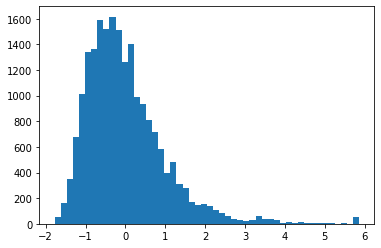

In [ ]:
hist = plt.hist(data_df.MedIncStandardScaler, bins=50)